# Understanding Linear vs Non-Linear Relationships

## What is a Relationship in Data?

A relationship means how two variables are connected. For example:
- Does more study time lead to higher exam scores?
- Does higher temperature affect ice cream sales?

We look at patterns in data to understand this.

---

## Linear Relationships

### How to Recognize:
- The data forms a straight line when plotted.
- The rate of change is constant — equal increases in one variable cause equal increases or decreases in the other.

### How It's Determined:
- Use a scatter plot to visualize the data.
- Fit a linear regression model (e.g., `y = mx + b`).
- Check:
  - R² score: A value closer to 1 means a better fit.
  - Residuals: The differences between actual and predicted values should be random.

### Example:
If you double study hours, test scores rise by the same amount.

---

## Non-Linear Relationships

### How to Recognize:
- The graph shows a curve or irregular pattern.
- The rate of change is not constant — increases vary at different points.

### How It's Determined:
- Plot the data. If it curves or bends, it’s likely non-linear.
- Fit models like:
  - Polynomial regression (e.g., `y = ax² + bx + c`)
  - Logarithmic, exponential, or other advanced models
- Use R² to evaluate model accuracy.

### Example:
Ice cream sales may grow quickly as it gets hot, but then level off even if it gets hotter.

---

## Key Differences

| Feature                  | Linear                        | Non-Linear                                 |
|--------------------------|-------------------------------|---------------------------------------------|
| Graph Shape              | Straight line                 | Curve or complex shape                      |
| Equation Form            | `y = mx + b`                  | e.g., `y = ax² + bx + c`, `y = a * log(x)`  |
| Change Rate              | Constant                      | Varies                                      |
| Model Used               | Linear Regression             | Polynomial, Logarithmic, Exponential, etc.  |
| Real-World Example       | Height vs Age (adults)        | Bacteria growth over time                   |

---

## Summary

- Linear relationships are simple and predictable.
- Non-linear relationships show more complex patterns.
- Always choose the model that fits the pattern of the data — not just the simplest one.

## 🔶 Linear Relationships

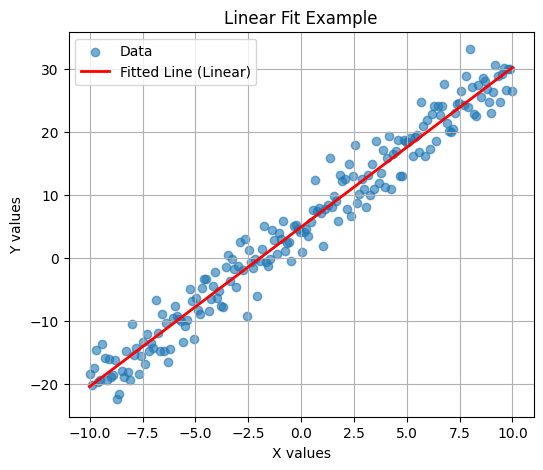

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random x values
np.random.seed(42)  # for reproducibility
linear_x = np.linspace(-10, 10, 200)

# Create a linear relationship with noise
linear_y = 2.5 * linear_x + 5 + 3 * np.random.randn(200)  # y = 2.5x + 5 + noise

# Fit a linear model (degree = 1)
coeffs = np.polyfit(linear_x, linear_y, deg=1)
linear_eq = np.poly1d(coeffs)

# Generate smooth line for plotting
x_line = np.linspace(-10, 10, 500)
y_line = linear_eq(x_line)

# Plot data and fitted line
plt.figure(figsize=(6, 5))
plt.scatter(linear_x, linear_y, label='Data', alpha=0.6)
plt.plot(x_line, y_line, color='red', label='Fitted Line (Linear)', linewidth=2)
plt.title("Linear Fit Example")
plt.xlabel("X values")
plt.ylabel("Y values")
plt.legend()
plt.grid(True)
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from tqdm import tqdm

k_values = [0.0001, 0.0005, 0.001, 0.005]

In [17]:
best_linear_score = -np.inf
best_linear_model = None

for k in k_values:
    for _ in tqdm(range(500)):
    
        X_train, X_test, y_train, y_test = train_test_split(linear_x.reshape(-1, 1), linear_y, test_size=0.3)
        
        model = Pipeline([
            ('stn', StandardScaler()),
            ('regressor', LinearRegression())
        ])
        
        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_test)
        
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)
        
        score = r2 - k * rmse
        
        if score > best_linear_score:
            best_linear_k = k
            best_linear_score = score
            best_linear_r2 = r2
            best_linear_rmse = rmse
            best_linear_model = model

100%|██████████| 500/500 [00:01<00:00, 268.57it/s]


In [18]:
print(f"Best-score : {float(best_linear_score)}")
print(f"Best-k : {best_linear_k}")
print(f"Best R² Score: {best_linear_r2:.4f}")
print(f"Best RMSE: {best_linear_rmse:.2f}")

Best-score : 0.9800853662154803
Best-k : 0.0005
Best R² Score: 0.9811
Best RMSE: 2.08


In [19]:
x_new = np.array([[12], [15], [-7]])

y_pred = best_linear_model.predict(x_new)

for xi, yi in zip(x_new, y_pred):
    print(f"Prediction for x = {xi[0]} → y ≈ {yi:.2f}")


Prediction for x = 12 → y ≈ 35.21
Prediction for x = 15 → y ≈ 42.79
Prediction for x = -7 → y ≈ -12.85


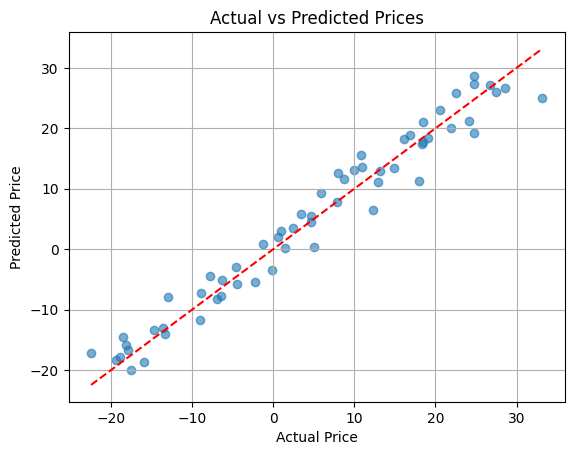

In [20]:
y_pred =  best_linear_model.predict(X_test)

plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.grid(True)
plt.show()

## 🔶 Non-Linear Relationships

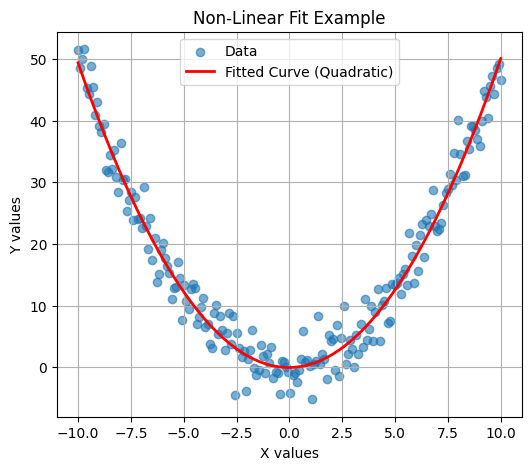

In [21]:
import numpy as np

# Generate random x values
np.random.seed(42)  # for reproducibility
non_linear_x = np.linspace(-10, 10, 200)
# Create a non-linear relationship (e.g., quadratic) with noise
non_linear_y = 0.5 * non_linear_x**2 + 3 * np.random.randn(200)

coeffs = np.polyfit(non_linear_x, non_linear_y, deg=2)
poly_eq = np.poly1d(coeffs)

# Generate smooth curve for plotting
x_line = np.linspace(-10, 10, 500)
y_line = poly_eq(x_line)

# Plot data and fitted curve
plt.figure(figsize=(6, 5))
plt.scatter(non_linear_x, non_linear_y, label='Data', alpha=0.6)
plt.plot(x_line, y_line, color='red', label='Fitted Curve (Quadratic)', linewidth=2)
plt.title("Non-Linear Fit Example")
plt.xlabel("X values")
plt.ylabel("Y values")
plt.legend()
plt.grid(True)
plt.show()


In [22]:
from sklearn.preprocessing import PolynomialFeatures

degrees = [2, 3, 4]

poly_r2 = -np.inf
poly_model = None

for deg in degrees:
    for _ in tqdm(range(500)):
        
        X_train, X_test, y_train, y_test = train_test_split(non_linear_x.reshape(-1, 1), non_linear_y, test_size=0.3)
        
        model = Pipeline([
            ('preprocessor', StandardScaler()),
            ('polynomial', PolynomialFeatures(degree=deg)),
            ('regressor', LinearRegression())
        ])
        
        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_test)
        
        r2 = r2_score(y_test, y_pred)
        
        if r2 > poly_r2:
            poly_r2 = r2
            poly_model = model

100%|██████████| 500/500 [00:01<00:00, 354.62it/s]


In [23]:
print(f"Best R² Score: {poly_r2:.4f}")

Best R² Score: 0.9848


In [24]:
x_new = np.array([12, 15, -7])

y_pred = poly_model.predict(x_new.reshape(-1,1))

for xi, yi in zip(x_new, y_pred):
    print(f"Prediction for x = {xi} → y ≈ {yi:.2f}")


Prediction for x = 12 → y ≈ 71.37
Prediction for x = 15 → y ≈ 111.25
Prediction for x = -7 → y ≈ 23.74


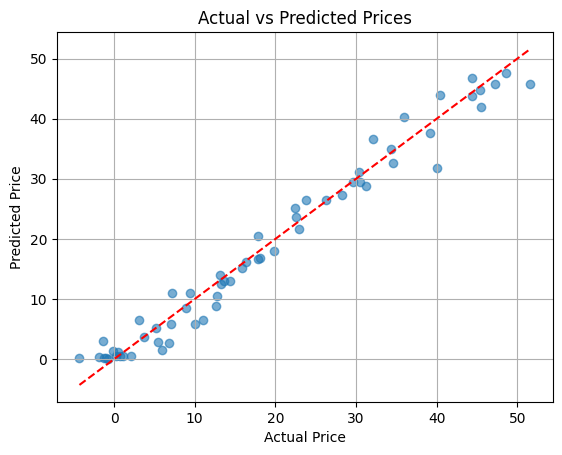

In [25]:
y_pred = poly_model.predict(X_test)

plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.grid(True)
plt.show()

# Comparison: Linear vs Non-Linear Fit

This section explains the key differences between the linear and non-linear fits shown in the two plots.

---

## Non-Linear Fit Example (Top Plot)

### Description:
- The fitted curve is a **quadratic function** of the form `y = ax² + bx + c`.
- The data forms a **U-shaped curve** (parabola).
- The rate of change is **not constant** — it decreases at first, then increases.

### What it Shows:
- A **non-linear relationship** between X and Y.
- A straight line would not represent the pattern accurately.
- Useful when data changes direction or has curvature.

### Real-Life Analogy:
- The height of a ball thrown into the air (goes up, slows down, then falls).

---

## Linear Fit Example (Bottom Plot)

### Description:
- The fitted line is a **straight line** using the equation `y = mx + b`.
- The data points follow a general upward trend.

### What it Shows:
- A **linear relationship** between X and Y.
- The rate of change is **constant** — as X increases, Y increases steadily.
- The straight line fits the data well.

### Real-Life Analogy:
- Total earnings based on hourly pay (more hours worked = more pay).

---

## Summary of Differences

| Feature              | Linear Fit                          | Non-Linear Fit                           |
|----------------------|--------------------------------------|-------------------------------------------|
| Line Shape           | Straight line                        | Curved line (parabola)                    |
| Equation Form        | `y = mx + b`                         | `y = ax² + bx + c`                        |
| Rate of Change       | Constant                             | Varies depending on X                     |
| Fit Accuracy         | Good for straight-line data          | Better for curved or complex data         |
| Best Use Case        | Predicting simple trends             | Modeling turning points or non-linear patterns |
| Example              | Hours worked vs. pay                 | Ball thrown into the air (height vs. time) |

---

By understanding the pattern in your data, you can choose the right model — linear for consistent trends, and non-linear for curves and more complex behaviors.

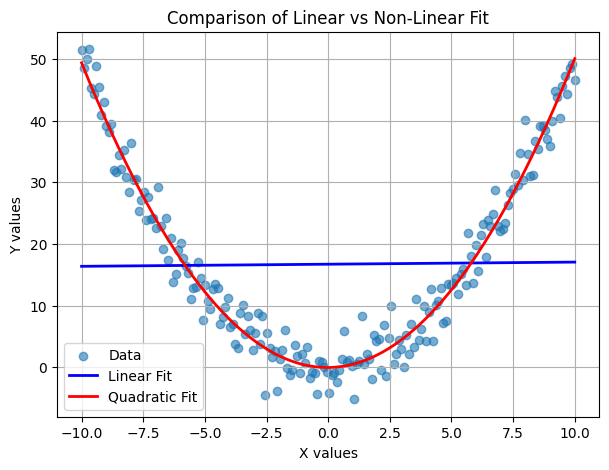

In [26]:
from sklearn.linear_model import LinearRegression

# Reshape x for sklearn
x_reshape = non_linear_x.reshape(-1, 1)

# ----- Linear Fit -----
linear_model = LinearRegression()
linear_model.fit(x_reshape, non_linear_y)
y_linear = linear_model.predict(x_reshape)

# ----- Non-Linear (Quadratic) Fit -----
coeffs = np.polyfit(non_linear_x, non_linear_y, deg=2)
poly_eq = np.poly1d(coeffs)
x_line = np.linspace(-10, 10, 500)
y_quad = poly_eq(x_line)

# ----- Plotting -----
plt.figure(figsize=(7, 5))
plt.scatter(non_linear_x, non_linear_y, label='Data', alpha=0.6)
plt.plot(non_linear_x, y_linear, color='blue', label='Linear Fit', linewidth=2)
plt.plot(x_line, y_quad, color='red', label='Quadratic Fit', linewidth=2)
plt.title("Comparison of Linear vs Non-Linear Fit")
plt.xlabel("X values")
plt.ylabel("Y values")
plt.legend()
plt.grid(True)
plt.show()


This plot shows a **synthetic dataset** that demonstrates a clear **non-linear relationship** between the variables.

### 🔍 What's in the Plot:

- The blue dots represent randomly generated **fake data** following a **quadratic (parabolic)** pattern, with some added noise.
- Two types of trend lines are drawn to compare fitting methods:
  - 🔵 **Linear Fit** (blue line): A straight-line attempt to fit the data using `LinearRegression`. It **does not capture** the curve well.
  - 🔴 **Quadratic Fit** (red curve): A second-degree polynomial that **accurately follows the curved trend** of the data.

### 🧠 Why This Matters:

- This example illustrates why it's important to choose the **right model** for your data.
- A linear model is simple, but in this case, it **fails to capture the actual shape** of the relationship.
- A non-linear (quadratic) model **fits the data much better** and provides a more accurate understanding of the pattern.

### 📌 Summary Table

| Element            | Description                                 |
|--------------------|---------------------------------------------|
| Fake Data          | Quadratic pattern with random noise         |
| Linear Fit         | Straight line using `LinearRegression`      |
| Quadratic Fit      | Curved fit using `np.polyfit(degree=2)`     |
| Best Fit           | ✅ Quadratic (non-linear)                    |